## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

W0815 01:13:36.882238 15320 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 01:13:36.895178 15320 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 01:13:36.897179 15320 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0815 01:13:37.474660 15320 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 01:13:37.478647 15320 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0815 01:13:39.776504 15320 deprecation.py:323] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0815 01:13:39.850311 15320 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.9387 - acc: 0.2969 - val_loss: 1.8334 - val_acc: 0.3390
Epoch 2/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.7015 - acc: 0.3918 - val_loss: 1.6333 - val_acc: 0.4098
Epoch 3/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6134 - acc: 0.4232 - val_loss: 1.5792 - val_acc: 0.4346
Epoch 4/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.5529 - acc: 0.4445 - val_loss: 1.5537 - val_acc: 0.4514
Epoch 5/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.5112 - acc: 0.4581 - val_loss: 1.5079 - val_acc: 0.4626
Epoch 6/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4630 - acc: 0.4797 - val_loss: 1.4837 - val_acc: 0.4681
Epoch 7/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4269 - acc: 0.4894 - val_loss: 1.4498 - 

50000/50000 [==============================] - 3s 55us/step - loss: 0.5224 - acc: 0.8127 - val_loss: 2.0119 - val_acc: 0.5103
Epoch 60/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.5083 - acc: 0.8180 - val_loss: 2.0987 - val_acc: 0.5122
Epoch 61/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.5028 - acc: 0.8194 - val_loss: 2.0614 - val_acc: 0.5174
Epoch 62/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.4786 - acc: 0.8278 - val_loss: 2.1187 - val_acc: 0.5130
Epoch 63/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.4995 - acc: 0.8199 - val_loss: 2.1048 - val_acc: 0.5144
Epoch 64/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.4695 - acc: 0.8325 - val_loss: 2.1901 - val_acc: 0.5172
Epoch 65/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.4474 - acc: 0.8396 - val_loss: 2.2036 - val_acc: 0.5105
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2194 - acc: 0.9215 - val_loss: 3.5490 - val_acc: 0.4923
Epoch 119/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2162 - acc: 0.9222 - val_loss: 3.6278 - val_acc: 0.4983
Epoch 120/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2064 - acc: 0.9259 - val_loss: 3.5752 - val_acc: 0.4999
Epoch 121/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2549 - acc: 0.9084 - val_loss: 3.5676 - val_acc: 0.4943
Epoch 122/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2449 - acc: 0.9125 - val_loss: 3.5464 - val_acc: 0.5047
Epoch 123/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2188 - acc: 0.9219 - val_loss: 3.5782 - val_acc: 0.4963
Epoch 124/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2335 - acc: 0.9151 - val_loss: 3.4574 - val_acc: 0.4999
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 55us/step - loss: 0.1452 - acc: 0.9484 - val_loss: 4.2427 - val_acc: 0.4958
Epoch 177/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1584 - acc: 0.9438 - val_loss: 4.2043 - val_acc: 0.5037
Epoch 178/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1622 - acc: 0.9425 - val_loss: 4.3795 - val_acc: 0.4908
Epoch 179/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1670 - acc: 0.9402 - val_loss: 4.2806 - val_acc: 0.4860
Epoch 180/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1704 - acc: 0.9408 - val_loss: 4.2997 - val_acc: 0.4902
Epoch 181/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1618 - acc: 0.9418 - val_loss: 4.3731 - val_acc: 0.4921
Epoch 182/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1277 - acc: 0.9554 - val_loss: 4.1923 - val_acc: 0.4989
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.1556 - acc: 0.9478 - val_loss: 4.5871 - val_acc: 0.4941
Epoch 235/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1186 - acc: 0.9587 - val_loss: 4.6122 - val_acc: 0.4973
Epoch 236/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.0757 - acc: 0.9740 - val_loss: 4.6140 - val_acc: 0.5013
Epoch 237/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.0975 - acc: 0.9659 - val_loss: 4.6863 - val_acc: 0.5081
Epoch 238/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.1124 - acc: 0.9622 - val_loss: 4.7097 - val_acc: 0.4954
Epoch 239/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.2056 - acc: 0.9330 - val_loss: 4.7001 - val_acc: 0.4844
Epoch 240/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2259 - acc: 0.9288 - val_loss: 4.5292 - val_acc: 0.4927
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.0550 - acc: 0.9804 - val_loss: 4.8801 - val_acc: 0.4943
Epoch 293/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0807 - acc: 0.9731 - val_loss: 4.9002 - val_acc: 0.4957
Epoch 294/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.3132 - acc: 0.9114 - val_loss: 4.9662 - val_acc: 0.4893
Epoch 295/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1605 - acc: 0.9476 - val_loss: 4.8587 - val_acc: 0.4944
Epoch 296/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0684 - acc: 0.9775 - val_loss: 4.7762 - val_acc: 0.5029
Epoch 297/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0491 - acc: 0.9835 - val_loss: 4.8172 - val_acc: 0.4986
Epoch 298/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0525 - acc: 0.9818 - val_loss: 4.8268 - val_acc: 0.4971
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.2243 - acc: 0.9355 - val_loss: 4.9879 - val_acc: 0.4908
Epoch 351/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2105 - acc: 0.9374 - val_loss: 4.7858 - val_acc: 0.4941
Epoch 352/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0786 - acc: 0.9740 - val_loss: 4.8053 - val_acc: 0.5005
Epoch 353/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0508 - acc: 0.9828 - val_loss: 4.8560 - val_acc: 0.4931
Epoch 354/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0499 - acc: 0.9832 - val_loss: 4.9153 - val_acc: 0.4924
Epoch 355/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0727 - acc: 0.9753 - val_loss: 4.9481 - val_acc: 0.4955
Epoch 356/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1176 - acc: 0.9606 - val_loss: 4.9755 - val_acc: 0.4890
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.0510 - acc: 0.9832 - val_loss: 5.1572 - val_acc: 0.4956
Epoch 409/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1659 - acc: 0.9482 - val_loss: 5.2826 - val_acc: 0.4813
Epoch 410/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1431 - acc: 0.9547 - val_loss: 5.1237 - val_acc: 0.4895
Epoch 411/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0530 - acc: 0.9821 - val_loss: 4.9997 - val_acc: 0.5023
Epoch 412/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0179 - acc: 0.9947 - val_loss: 5.0721 - val_acc: 0.5024
Epoch 413/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0157 - acc: 0.9954 - val_loss: 5.0833 - val_acc: 0.5066
Epoch 414/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0536 - acc: 0.9823 - val_loss: 5.2505 - val_acc: 0.4943
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.0328 - acc: 0.9891 - val_loss: 5.1951 - val_acc: 0.5026
Epoch 467/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0428 - acc: 0.9850 - val_loss: 5.2675 - val_acc: 0.4965
Epoch 468/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1652 - acc: 0.9517 - val_loss: 5.2377 - val_acc: 0.4885
Epoch 469/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1568 - acc: 0.9521 - val_loss: 5.1246 - val_acc: 0.4910
Epoch 470/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0631 - acc: 0.9791 - val_loss: 5.2065 - val_acc: 0.4981
Epoch 471/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0429 - acc: 0.9853 - val_loss: 5.1521 - val_acc: 0.4993
Epoch 472/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0299 - acc: 0.9902 - val_loss: 5.2221 - val_acc: 0.5003
Epoch 473/500
50000/50000 [=======

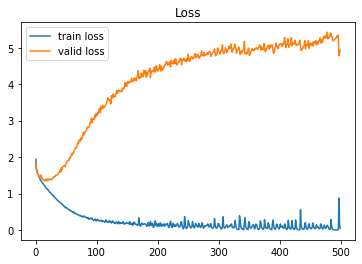

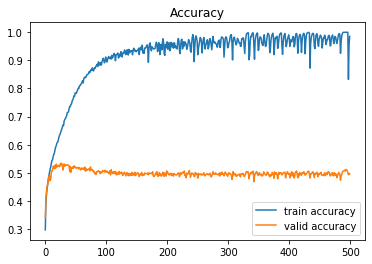

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()